# Relation between Population, Import, Export and COVID Cases for <br>TOP-25 Countries based on number of cases

## Python Notebook With Charts, Tables and Maps
---

By Gargeya

### Importing the dependencies

In [1]:
import tradingeconomics as te
import matplotlib.pyplot as plt
import seaborn as sns

### API Login

In [2]:
te.login();

### Getting Data

In [3]:
population_in_cities = te.getWBIndicator(series_code='EN.URB.MCTY.TL.ZS', output_type='df')

data = te.getIndicatorData(country='all', indicators=['coronavirus cases', 'population'], output_type='df')
covid_cases = data[data['Category']=='Coronavirus Cases']
population = data[data['Category']=='Population']

In [4]:
covid_case = covid_cases[['Country', 'LatestValue']].set_index("Country")
covid_case.columns = ['Covid_Cases']
covid_case.head()

,Covid_Cases
Country,
Afghanistan,157218.0
Albania,199555.0
Algeria,210152.0
Andorra,16712.0
Angola,65144.0


In [5]:
populations = population[['Country', 'LatestValue']].set_index("Country")
populations.columns = ['Populations']
populations.head()

,Populations
Country,
Afghanistan,33.20
Albania,2.85
Algeria,44.23
Angola,33.00
Argentina,45.38


In [6]:
data = covid_case.join(populations, how='inner')

In [7]:
data.head()

,Covid_Cases,Populations
Country,,
Afghanistan,157218.0,33.20
Albania,199555.0,2.85
Algeria,210152.0,44.23
Angola,65144.0,33.00
Argentina,5326448.0,45.38


In [8]:
data.sort_values(['Covid_Cases', 'Populations'], ascending=False, inplace=True)

In [9]:
data.head()

,Covid_Cases,Populations
Country,,
United States,48229210.0,329.48
India,34580832.0,1347.12
Brazil,22080906.0,211.82
United Kingdom,10146915.0,67.20
Russia,9604233.0,146.20


In [10]:
data.Populations = (data.Populations -data.Populations.min())/data.Populations.max()
data.Covid_Cases = (data.Covid_Cases - data.Covid_Cases.min())/data.Covid_Cases.max()

In [11]:
data = data.dropna().head(25)

In [12]:
data = data.sort_values(by='Populations', ascending=False)

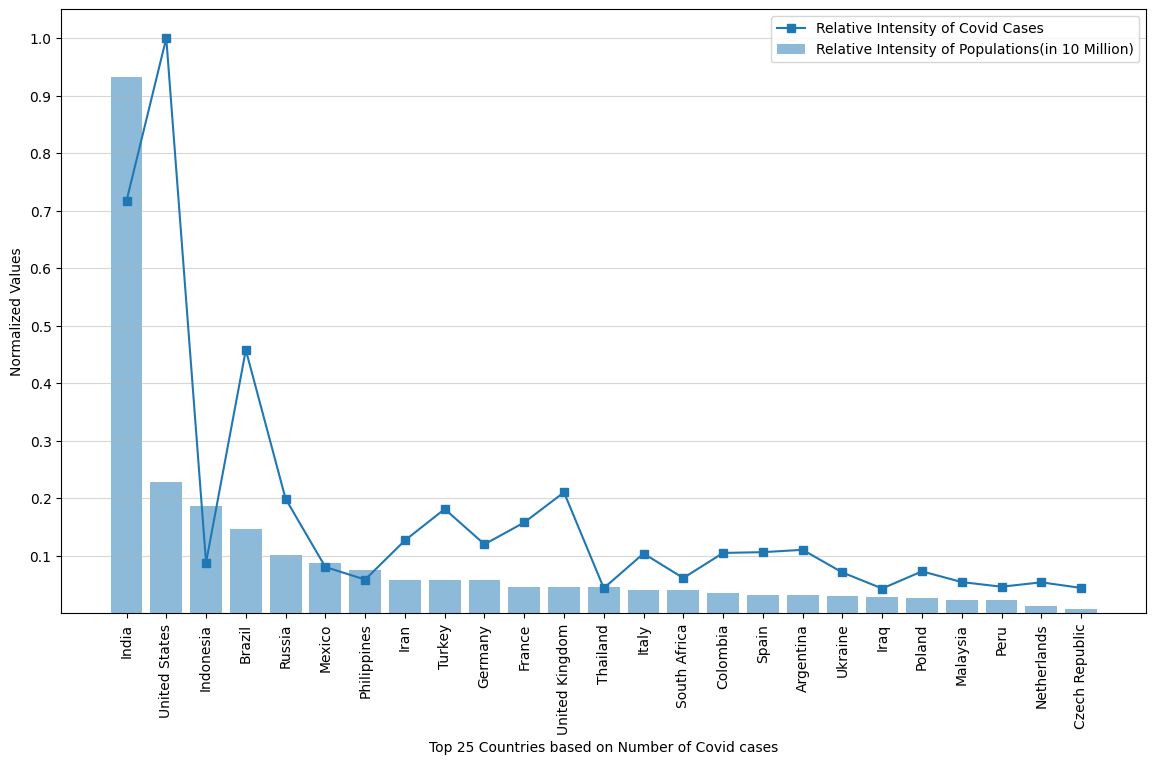

In [13]:
plt.figure(figsize=(14,8),dpi=100)
plt.bar(data.index, data.Populations, label='Relative Intensity of Populations(in 10 Million)', alpha=0.5)
plt.plot(data.index, data.Covid_Cases, label='Relative Intensity of Covid Cases', marker='s')
plt.xlabel("Top 25 Countries based on Number of Covid cases")
plt.ylabel("Normalized Values")
plt.legend()
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.grid(axis='y',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

## Adding Import and Export Comparison to the data

In [14]:
data[['Import', 'Export']] = [0,0]

In [ ]:
imports = []
for country in data.index[1:]:
    print(country)
    i = te.getTotalByType(country=country, type='import', output_type='df').iloc[0,3]
    exports.append(i)

In [16]:
imports

[]

In [17]:
exports = []

In [18]:
for country in data.index[24:]:
    print(country)
    i = te.getTotalByType(country=country, type='export', output_type='df').iloc[0,3]
    exports.append(i)
    print(i)
    print()

Czech Republic
192307379805



In [19]:
exports

[192307379805]

In [20]:
for i, country in enumerate(data.index[:len(imports)]):
#     print(i, country)
    data.at[country, 'Import'] = imports[i]
    

for i, country in enumerate(data.index[:len(exports)]):
#     print(i, country)
    data.at[country, 'Export'] = exports[i]

In [21]:
data

,Covid_Cases,Populations,Import,Export
Country,,,,
India,0.717009,0.933204,0,192307379805
United States,0.999998,0.228223,0,0
Indonesia,0.088246,0.187156,0,0
Brazil,0.457831,0.146713,0,0
Russia,0.199136,0.101254,0,0
Mexico,0.080527,0.087267,0,0
Philippines,0.058714,0.075899,0,0
Iran,0.126751,0.058164,0,0
Turkey,0.181342,0.057894,0,0


## Normalize the Import and Export Values

In [22]:
data.Import = (data.Import -data.Import.min())/data.Import.max()
data.Export = (data.Export - data.Export.min())/data.Export.max()

In [23]:
data.head()

,Covid_Cases,Populations,Import,Export
Country,,,,
India,0.717009,0.933204,NaN,1.0
United States,0.999998,0.228223,NaN,0.0
Indonesia,0.088246,0.187156,NaN,0.0
Brazil,0.457831,0.146713,NaN,0.0
Russia,0.199136,0.101254,NaN,0.0


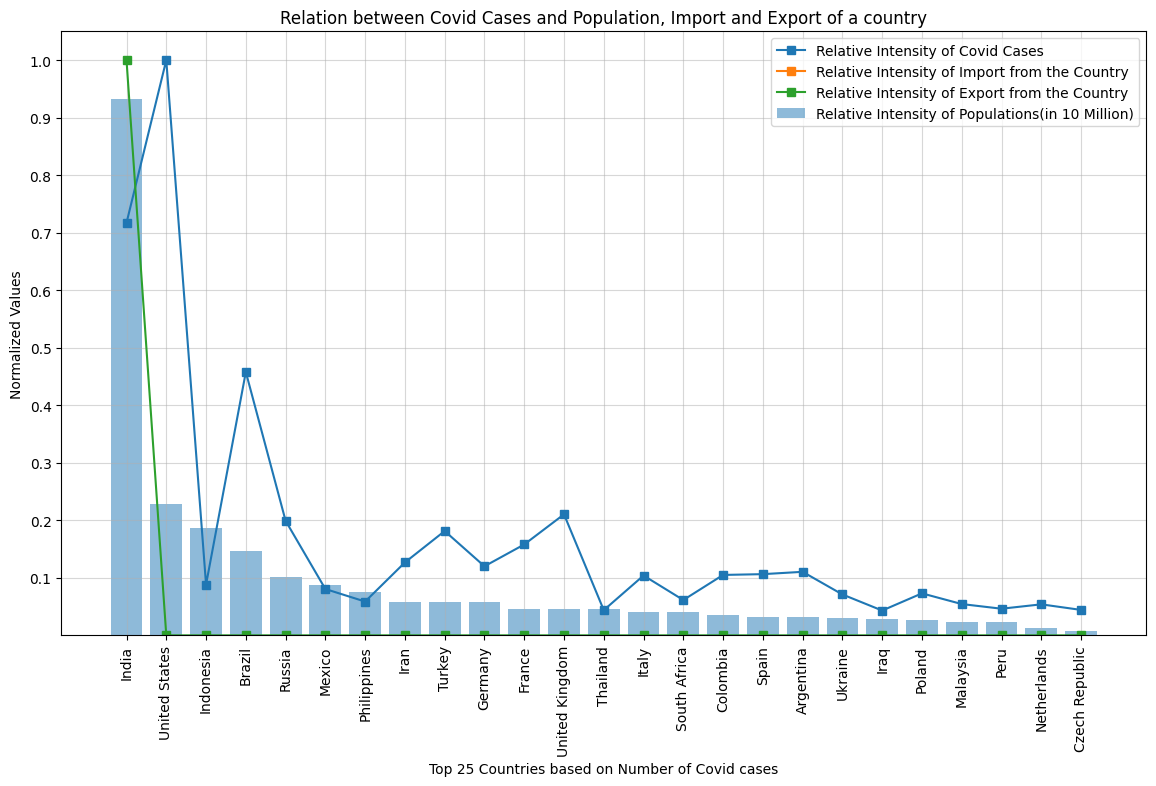

In [24]:
plt.figure(figsize=(14,8),dpi=100)
plt.bar(data.index, data.Populations, label='Relative Intensity of Populations(in 10 Million)', alpha=0.5)
plt.plot(data.index, data.Covid_Cases, label='Relative Intensity of Covid Cases', marker='s')
plt.plot(data.index, data.Import, label='Relative Intensity of Import from the Country', marker='s')
plt.plot(data.index, data.Export, label='Relative Intensity of Export from the Country', marker='s')
plt.xlabel("Top 25 Countries based on Number of Covid cases")
plt.title("Relation between Covid Cases and Population, Import and Export of a country")
plt.ylabel("Normalized Values")
plt.legend()
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.grid(axis='both',alpha=0.5)
plt.xticks(rotation=90)
plt.savefig("COVID_Relation between population, import, export  and covid cases of diff contries.jpg", dpi=150, bbox_inches='tight')
plt.show()